Filters have many applications in sound synthesis and signal processing. Their basic job is to shape the spectrum of a signal by emphasizing or supressing frequencies. They are the essential component in subtractive synthesis and their individual qualities are responsible for an instrument's distincive sound. Famous filter designs, like the Moog Ladder Filter, are thus standards in the design of analog and digital musical instruments.


## Filter Characteristics

Regardless of the implementation details, both analog and digital filters can be categorized by their filter characteristics. These describe, which frequency components of the signal are passed through and which frequencies are rejected. This section describes the three most frequently used filer types.

The central parameter for most filter types is the cutoff frequency $f_c$. Depending on the characteristic, the cutoff frequency is that frequency which separates passed from rejected frequencies.




### Lowpass

The lowpass filter (LP) is the most frequently used characteristic in sound synthesis.
It is used for the typical bass sounds known from analog and digital subtractive synthesis. With the right envelope settings, it creates the plucked sounds.
An LP filter lets all frequencies below the cutoff frequency *pass*. 
$f_c$ is defined as that frequency where the gain of the filter is $-3\ \mathrm{dB}$, which is equivalent to $50\ \%$.
The following plot shows the frequency-dependent gain of a lowpass with a cutoff at $100\ \mathrm{Hz}$.

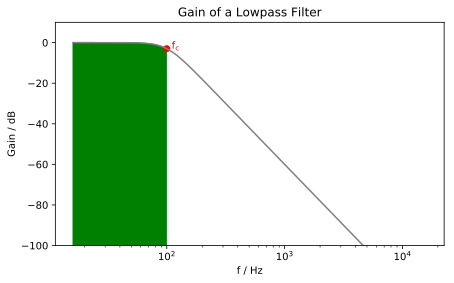

In [208]:
# load relevant modules from header file
%run header.ipynb

fs = 16000 
fc = 100
N  = 10000

f  = np.linspace(0.001,1,N)

b, a = signal.iirfilter(3, fc/fs, btype='lowpass', analog=True, ftype='butter')

w, h = signal.freqs(b, a, f)

f = f*fs;

H =  20 * np.log10(abs(h))

plt.semilogx(f , H,color=[0.5,0.5,0.5]);

plt.xlabel('f / Hz');
plt.ylabel('Gain / dB');

cutInd = round((0.33*fs/fc));

plt.fill_between(f[0:cutInd], H[0:cutInd], -120,color='green');

plt.scatter(fc, -3, marker='o', color='r');
plt.text(fc+10, -3, '$f_c$',horizontalalignment='left',color='red');

plt.ylim([-100,10]);

plt.title('Gain of a Lowpass Filter');



### Highpass Filter

The highpass (HP) filter is the opposite of the lowpass filter. It rejects low frequencies and lets high frequencies *pass*. 
The following plot shows the frequency-dependent gain of a highpass with a cutoff at $100\ \mathrm{Hz}$.




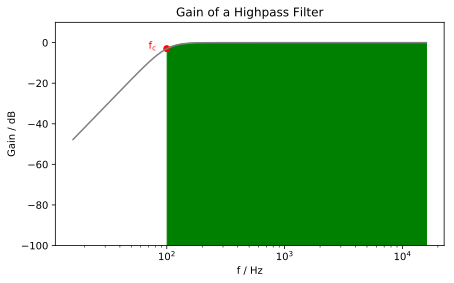

In [206]:
# load relevant modules from header file
%run header.ipynb

fs = 16000 
fc = 100
N  = 10000

f  = np.linspace(0.001,1,N)

b, a = signal.iirfilter(3, fc/fs, btype='highpass', analog=True, ftype='butter')

w, h = signal.freqs(b, a, f)

f = f*fs;

H =  20 * np.log10(abs(h))

plt.semilogx(f , H,color=[0.5,0.5,0.5]);

plt.xlabel('f / Hz');
plt.ylabel('Gain / dB');

cutInd = round((0.33*fs/fc));

plt.fill_between(f[cutInd:-1], H[cutInd:-1], -120,color='green');

plt.scatter(fc, -3, marker='o', color='r');
plt.text(fc-30, -3, '$f_c$',horizontalalignment='left',color='red');

plt.ylim([-100,10]);

plt.title('Gain of a Highpass Filter');



## Bandpass Filter

The bandbass (BP) filter is a combination of lowpass and highpass. It lets frequencies between a lower cutoff frequency $f_{low}$ and an upper cutoff frequency $f_{up}$ *pass*. The BP filter can thus also be defined by its center frequency

$f_{cent} = \frac{f_{up}+f_{low}}{2}$

and the bandwith of the so called *passband*

$b = f_{up}-f_{low}$.

The following plot shows a bandpass with a center frequency of $f_{cent} = 100\ \mathrm{Hz}$ and a bandwidht of $50\ \mathrm{Hz}$.

38


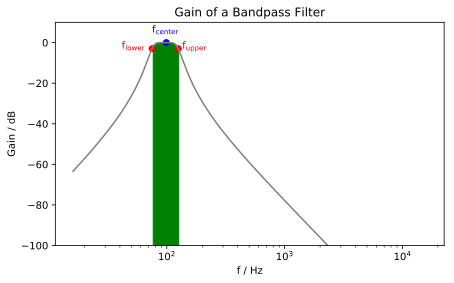

In [207]:
# load relevant modules from header file
%run header.ipynb

fs = 16000 

fc1 = 75
fc2 = 125

N  = 10000

f  = np.linspace(0.001,1,N)

b, a = signal.iirfilter(3, [fc1/fs, fc2/fs], btype='bandpass', analog=True, ftype='butter')

w, h = signal.freqs(b, a, f)

f = f*fs;

H =  20 * np.log10(abs(h))

plt.semilogx(f , H,color=[0.5,0.5,0.5]);

plt.xlabel('f / Hz');
plt.ylabel('Gain / dB');

cutInd1 = round((0.33*fs/fc1));
cutInd2 = round((0.30*fs/fc2));

plt.fill_between(f[cutInd2:cutInd1], H[cutInd2:cutInd1], -120,color='green');

plt.scatter(fc2, -3, marker='o', color='r');
plt.text(fc2+10, -3, '$f_{upper}$',horizontalalignment='left',color='red');

plt.scatter(fc1, -3, marker='o', color='r');
plt.text(fc1-10, -3, '$f_{lower}$',horizontalalignment='right',color='red');


plt.scatter(round(0.5*(fc2+fc1))-1, 0, marker='o', color='b');
plt.text(fc1, 5, '$f_{center}$',horizontalalignment='left',color='blue');

plt.ylim([-100,10]);

plt.title('Gain of a Bandpass Filter');

